Importing packages for face recognition

In [1]:
import os,sys
import matplotlib.pyplot as plt
import cv2
import pickle
import numpy as np
from imutils import paths
from sklearn.cluster import KMeans

Defining functions for face detection and recognition

In [2]:
def face_detection(frame):
    # net = cv2.dnn.readNetFromCaffe(prototxt, caffemodel)
    
    cols = frame.shape[1]
    rows = frame.shape[0]
    MAX_WIDTH = 1024
    scale = 1   
    if (cols > MAX_WIDTH):
        scale = MAX_WIDTH * 1.0 / cols
        _frame = cv2.resize(frame, (MAX_WIDTH, int(scale * rows)))
    else:
        _frame = frame
    
    rows, cols = _frame.shape[:2]

    rect = []
    for alpha in range(10, 15, 1):
        alpha = alpha/10.0
        for beta in range(0, 11, 10):
            frame = _frame.copy()
            frame = brightness_contrast(frame, alpha, -beta * 10 * (alpha - 1))
            net.setInput(cv2.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (104.0, 177.0, 123.0), False, False))
            detections = net.forward()
            for i in range(detections.shape[2]):
                confidence = detections[0, 0, i, 2]
                if confidence > confThreshold:
                    x1 = int(detections[0, 0, i, 3] * cols)
                    y1 = int(detections[0, 0, i, 4] * rows)
                    x2 = int(detections[0, 0, i, 5] * cols)
                    y2 = int(detections[0, 0, i, 6] * rows)
                    
                    rect.append([x1,y1,x2,y2])
            if len(rect) != 0:
                return _frame, rect
            
    return _frame, rect

def brightness_contrast(image, alpha, beta):
    rstimg = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return rstimg

def face_recognition_LBPH(face_image, LBPH_model):

    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
    ids,conf = LBPH_model.predict(face_image)
    
    if conf < 50:
        return 'No Match'
    else:
        return target_names[ids]


Import face detection model and recognition model

In [3]:
modelFile = "model/det_uint8.pb"
configFile = "model/det.pbtxt"

net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

inWidth = 300
inHeight = 300
confThreshold = 0.9

# load face recognition LBPH model
fname = "model/LBPH-face-0.8820.yml"
if not os.path.isfile(fname):
    print("Please train the data first")
    exit(0)
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read(fname)

# target names
target_names = ['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair']

Detect/Recognize face and show result

George W Bush


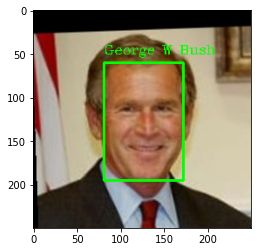

In [4]:
imagePath = 'D:\\George_W_Bush_0044.jpg'

image = cv2.imread(imagePath)
h, w, _ = image.shape

result = ''
if image is not None:
    imgname = os.path.basename(imagePath)
    dirpath = os.path.dirname(imagePath)
    last_dirname = dirpath.split('\\')[-1]
    name = imgname.split('.')[0]
    save_name = last_dirname + '_' + name
    resized_img, face_rect = face_detection(image)

    temp_img = resized_img.copy()

    real_face_count = 0


    if len(face_rect) != 0:
        face_count = 0
        for i in range(len(face_rect)):

            x1 = face_rect[i][0]
            y1 = face_rect[i][1]
            x2 = face_rect[i][2]
            y2 = face_rect[i][3]

            face_img = resized_img[y1:y2, x1:x2]

            predict_name = face_recognition_LBPH(face_img, recognizer)
            print(predict_name)

            cv2.rectangle(temp_img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.putText(temp_img, predict_name, (x1,y1 - 10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB) 

            plt.imshow(temp_img)
            plt.show()


    else:
        plt.imshow(image)
        plt.show()
